In [1]:
# Baseline data
baseline_data = {
    'R2': [0.9467, 0.9443, 0.9324, 0.9399, 0.9338, 0.9362, 0.9216, 0.9461],
    'MAE': [0.0942, 0.0969, 0.1086, 0.1037, 0.1075, 0.1044, 0.1217, 0.0930],
    'MSE': [0.0181, 0.0189, 0.0228, 0.0204, 0.0224, 0.0216, 0.0266, 0.0181],
    'TOL90': [0.2190, 0.2258, 1.3353, 0.2299, 0.2421, 0.2364, 0.2564, 0.2199]
}

# MeCoMeP data
mecomep_data = {
    'R2': [0.9574, 0.9571, 0.9480, 0.9520, 0.9356, 0.9482, 0.9264, 0.9677],
    'MAE': [0.0858, 0.0873, 0.0956, 0.0940, 0.1056, 0.0956, 0.1208, 0.0715],
    'MSE': [0.0144, 0.0146, 0.0175, 0.0163, 0.0219, 0.0176, 0.0250, 0.0109],
    'TOL90': [0.1998, 0.1984, 1.3360, 0.2071, 0.2345, 0.2191, 0.2566, 0.1683]
}

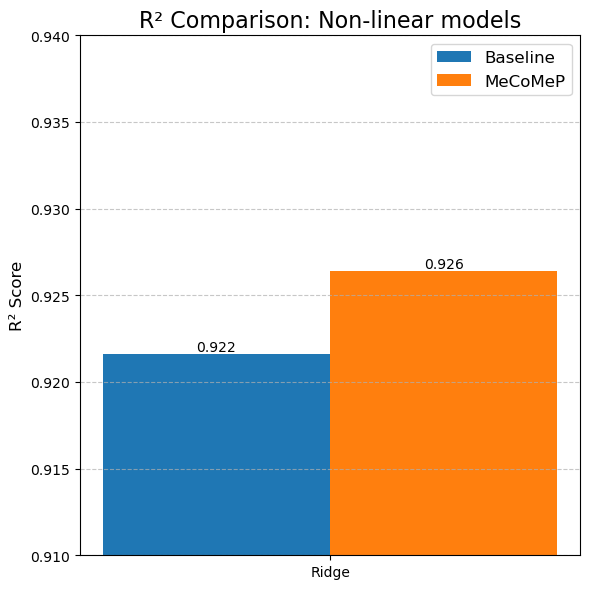

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Data
models = ['RFR', 'XGB', 'ANN', 'GPR', 'KNN', 'SVR', 'Ridge', 'Branch MLP']
baseline_r2 = [0.9467, 0.9443, 0.9324, 0.9399, 0.9338, 0.9362, 0.9216, 0.9461]
mecomep_r2 = [0.9574, 0.9571, 0.9480, 0.9520, 0.9356, 0.9482, 0.9264, 0.9677]

# Select subset of models (by index or name)
selected_indices = [6]  # Indices of models to include

# Filter the data for the selected models
models_subset = [models[i] for i in selected_indices]
baseline_r2_subset = [baseline_r2[i] for i in selected_indices]
mecomep_r2_subset = [mecomep_r2[i] for i in selected_indices]

# Create the bar plot
x = np.arange(len(models_subset))
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(6, 6))

# Bars for Baseline and MeCoMeP
baseline_bars = ax.bar(x - width/2, baseline_r2_subset, width, label='Baseline', color='#1f77b4')
mecomep_bars = ax.bar(x + width/2, mecomep_r2_subset, width, label='MeCoMeP', color='#ff7f0e')

# Add value labels to the bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.3f}',
                ha='center', va='bottom', fontsize=10)

autolabel(baseline_bars)
autolabel(mecomep_bars)

# Customize plot
ax.set_title('R² Comparison: Non-linear models', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(models_subset, fontsize=10)
ax.set_ylabel('R² Score', fontsize=12)
ax.set_ylim(0.91, 0.94)  # Set the y-axis to start at 0.9
ax.legend(fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


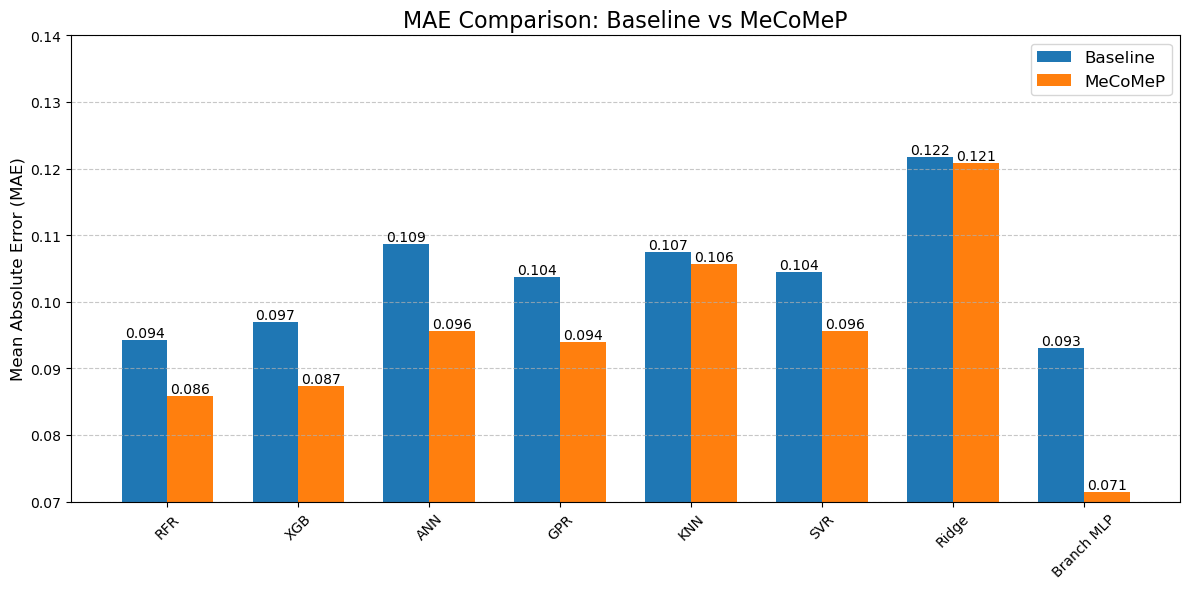

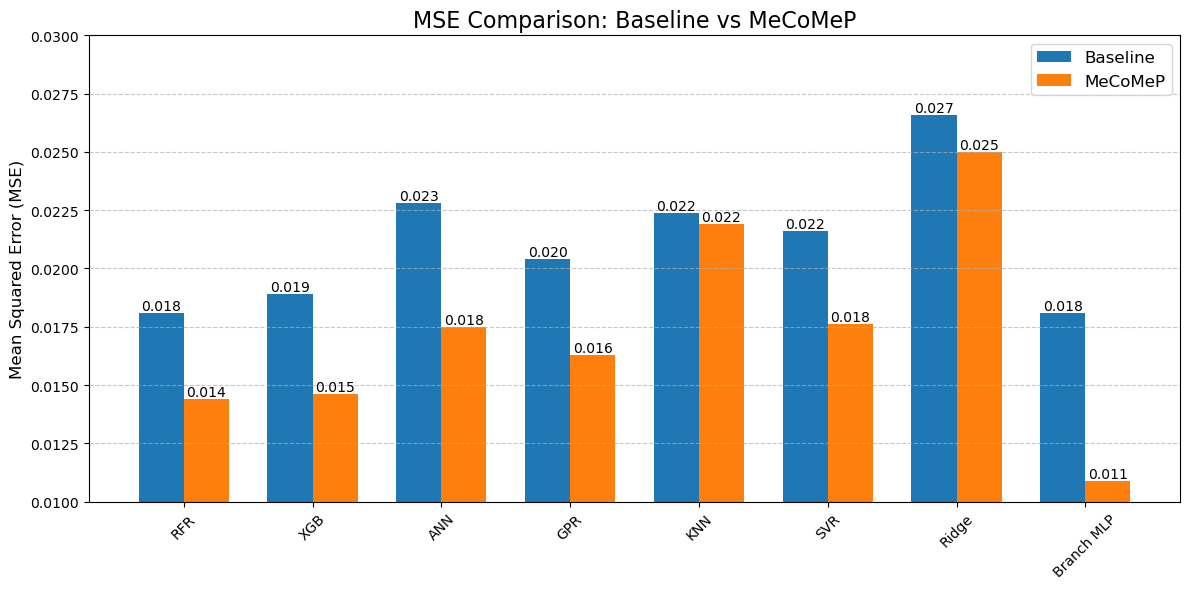

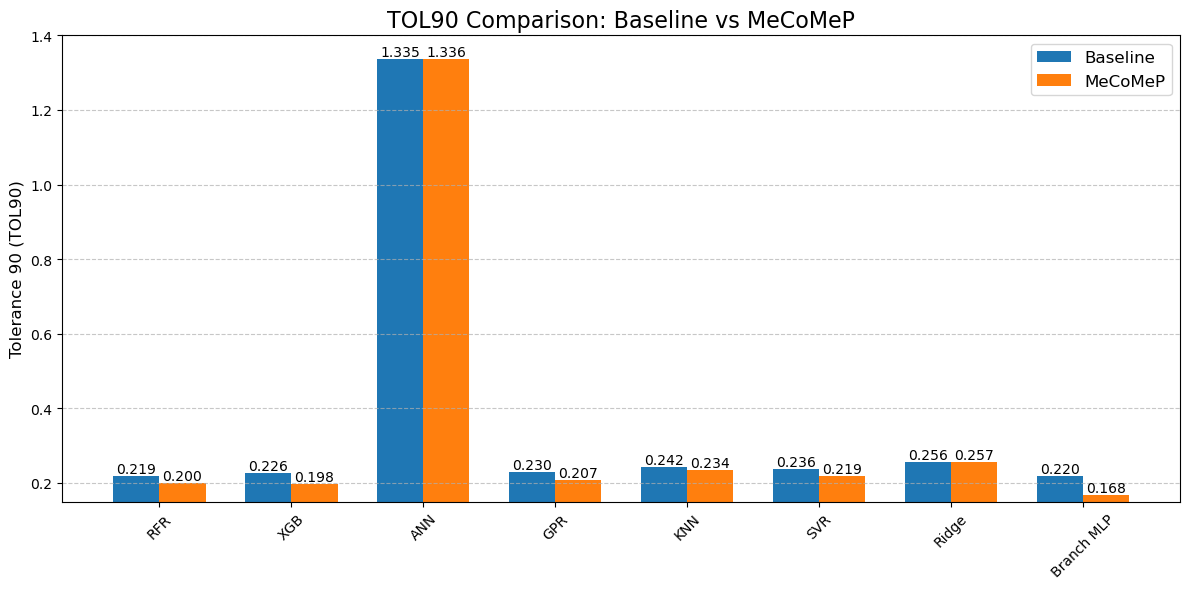

In [6]:
# Data
models = ['RFR', 'XGB', 'ANN', 'GPR', 'KNN', 'SVR', 'Ridge', 'Branch MLP']

# Baseline data
baseline_data = {
    'R2': [0.9467, 0.9443, 0.9324, 0.9399, 0.9338, 0.9362, 0.9216, 0.9461],
    'MAE': [0.0942, 0.0969, 0.1086, 0.1037, 0.1075, 0.1044, 0.1217, 0.0930],
    'MSE': [0.0181, 0.0189, 0.0228, 0.0204, 0.0224, 0.0216, 0.0266, 0.0181],
    'TOL90': [0.2190, 0.2258, 1.3353, 0.2299, 0.2421, 0.2364, 0.2564, 0.2199]
}

# MeCoMeP data
mecomep_data = {
    'R2': [0.9574, 0.9571, 0.9480, 0.9520, 0.9356, 0.9482, 0.9264, 0.9677],
    'MAE': [0.0858, 0.0873, 0.0956, 0.0940, 0.1056, 0.0956, 0.1208, 0.0715],
    'MSE': [0.0144, 0.0146, 0.0175, 0.0163, 0.0219, 0.0176, 0.0250, 0.0109],
    'TOL90': [0.1998, 0.1984, 1.3360, 0.2071, 0.2345, 0.2191, 0.2566, 0.1683]
}

# Plotting function
def plot_metric(metric, y_min, y_max, ylabel):
    x = np.arange(len(models))
    width = 0.35  # Width of the bars

    fig, ax = plt.subplots(figsize=(12, 6))

    # Bars for Baseline and MeCoMeP
    baseline_bars = ax.bar(x - width / 2, baseline_data[metric], width, label='Baseline', color='#1f77b4')
    mecomep_bars = ax.bar(x + width / 2, mecomep_data[metric], width, label='MeCoMeP', color='#ff7f0e')

    # Add value labels to the bars
    def autolabel(bars):
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.3f}',
                    ha='center', va='bottom', fontsize=10)

    autolabel(baseline_bars)
    autolabel(mecomep_bars)

    # Customize plot
    ax.set_title(f'{metric} Comparison: Baseline vs MeCoMeP', fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45, fontsize=10)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_ylim(y_min, y_max)  # Adjust y-axis range
    ax.legend(fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

# Plot for each metric
plot_metric('MAE', 0.07, 0.14, 'Mean Absolute Error (MAE)')
plot_metric('MSE', 0.01, 0.03, 'Mean Squared Error (MSE)')
plot_metric('TOL90', 0.15, 1.4, 'Tolerance 90 (TOL90)')
